# **Análise de Regressão para um E-Commerce**

Uma empresa de e-commerce, comercializa produtos através de seu website e através do seu app para dispositivos móveis.  
  
Para efetuar uma compra, um cliente realiza um cadastro no portal (usando web site ou app). Cada vez que o cliente realiza o login, o sistema registra o tempo que fica logado, seja no app ou no web site. Para cada cliente, a empresa mantém o registro de vendas com o total de gasto por mês.  
  
A empresa gostaria de aumentar as vendas, mas o orçamento permite investir somente no web site ou no app, neste momento. O objetivo é melhorar a experiência do cliente durante a navegação no sistema, aumentando o tempo logado, aumentando o engajamento e, conseguentemente, aumentando as vendas.  
  
O meu papel neste trabalho como Cientista de Dados, é auxiliar a empresa a tomar essa decisão com base em dados. Vamos utilizar a construção de um modelo de Regressão Linear, para entender como as variáveis se relacionam entre si. Com base no melhor entendimento das relações entre as variáveis, será possível indicar para a empresa, qual a melhor maneira de investir (web site ou app) para atingir o aumento nas vendas desejado. Importante destacar, que a escolha da utilização de modelos de Regressão se justfica pelo fato de ser um algoritmo simples e que permite a leitura do relacionamento entre as variáveis de maneiro muito simples - diferente de outros algoritmos que também poderia ser utilizados nesta pesquisa.
  
*Os dados usados neste notebook são fictícios, mas que representam dados reais. Os dados representam um mês de operação do portal de e-commerce.*  
  
**Dicionário de dados:**
* tempo_cadastro_cliente (float64): tempo que o cliente está cadastrado. O número de meses foi convertido para o número de anos.  
* numero_medio_cliques_por_sessao (float64): número médio de cliques (ou toques) em cada sessão.  
* tempo_total_logado_app (float64): tempo total logado no app em minutos.  
* tempo_total_logado_website (float64): tempo total logado no web site em minutos.  
* valor_total_gasto (float64): valor total gasto pelo cliente em um mês em R$.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

sns.set_style('whitegrid')
plt.style.use("ggplot")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## **Carregando os Dados**

In [2]:
dados = pd.read_csv('dados/dataset.csv')
dados.sample(10) # Visualizando uma amostra

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
215,0.801516,32.529769,11.747732,36.939882,298.762008
353,2.957449,34.729080,11.966898,36.547596,506.132342
196,3.864861,36.139662,12.050267,36.959643,595.803819
381,4.543332,33.551651,11.936895,35.900253,558.948112
102,3.827376,33.304337,12.692661,37.333591,535.480775
316,3.755869,31.818617,11.226546,35.669935,446.418673
121,3.164944,33.167137,11.928842,36.914633,475.759068
339,4.116340,33.398260,11.037850,38.617334,510.159817
246,4.541695,34.595777,11.332488,35.459863,568.717576
12,4.019051,35.630854,12.125402,38.187764,597.739879


In [3]:
print(f"O conjunto de dados possui {dados.shape[0]} linhas e {dados.shape[1]} colunas.")

O conjunto de dados possui 500 linhas e 5 colunas.


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tempo_cadastro_cliente           500 non-null    float64
 1   numero_medio_cliques_por_sessao  500 non-null    float64
 2   tempo_total_logado_app           500 non-null    float64
 3   tempo_total_logado_website       500 non-null    float64
 4   valor_total_gasto                500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


Podemos perceber que não temos valores nulos em nosso conjunto de dados e todas as nossas variáveis são numéricas (quantitativas).

A variável "valor_total_gasto", será nossa variável *target*. Porém, o foco mais importante neste trabalho não será o necessariamente a previsão que o modelo irá fazer do valor total gasto; mas sim, estudar o relacionamento entre as variáveis que o modelo encontrou durante o aprendizado!

## **Análise Exploratória**

Vamos começar explorar nosso conjunto de dados, analisando as distribuições das variáveis. 

Um dos pré-requisitos para aplicar um algoritmo de Regressão Linear, é que as variáveis sigam uma distribuição normal. Portanto, vamos verificar:

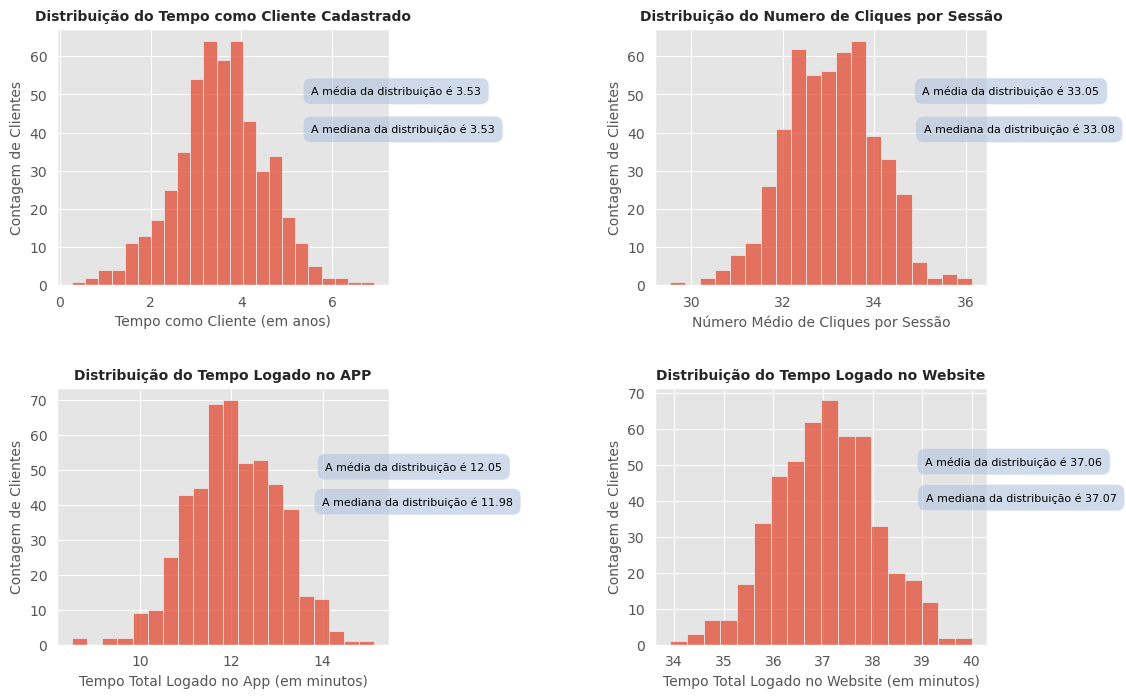

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8)) # grade com 4 subplots, duas linhas e duas colunas
plt.subplots_adjust(wspace=0.8, hspace=0.4) # ajustando espaçamento entre os gráficos

sns.histplot(dados, x='tempo_cadastro_cliente', ax=axs[0, 0]);
axs[0, 0].set_title("Distribuição do Tempo como Cliente Cadastrado", fontsize=10, fontweight='bold');
axs[0, 0].set_xlabel("Tempo como Cliente (em anos)", fontsize=10);
axs[0, 0].set_ylabel("Contagem de Clientes", fontsize=10);

media = dados['tempo_cadastro_cliente'].mean()
mediana = dados['tempo_cadastro_cliente'].median()

axs[0, 0].text(media + 2, 50, f"A média da distribuição é {media:.2f}", fontsize=8, color='black', ha='left', 
         bbox={'facecolor' : 'lightsteelblue',
               'alpha': 0.6,
               'pad': 0.7,
               'boxstyle' : 'round'});

axs[0, 0].text(mediana + 2, 40, f"A mediana da distribuição é {mediana:.2f}", fontsize=8, color='black', ha='left', 
         bbox={'facecolor' : 'lightsteelblue',
               'alpha': 0.6,
               'pad': 0.7,
               'boxstyle' : 'round'});

## numero_medio_cliques_por_sessao
sns.histplot(dados, x='numero_medio_cliques_por_sessao', ax=axs[0, 1]);
axs[0, 1].set_title("Distribuição do Numero de Cliques por Sessão", fontsize=10, fontweight='bold');
axs[0, 1].set_xlabel("Número Médio de Cliques por Sessão", fontsize=10);
axs[0, 1].set_ylabel("Contagem de Clientes", fontsize=10);

media1 = dados['numero_medio_cliques_por_sessao'].mean()
mediana1 = dados['numero_medio_cliques_por_sessao'].median()

axs[0, 1].text(media1 + 2, 50, f"A média da distribuição é {media1:.2f}", fontsize=8, color='black', ha='left', 
         bbox={'facecolor' : 'lightsteelblue',
               'alpha': 0.6,
               'pad': 0.7,
               'boxstyle' : 'round'});

axs[0, 1].text(mediana1 + 2, 40, f"A mediana da distribuição é {mediana1:.2f}", fontsize=8, color='black', ha='left', 
         bbox={'facecolor' : 'lightsteelblue',
               'alpha': 0.6,
               'pad': 0.7,
               'boxstyle' : 'round'});

## tempo_total_logado_app
sns.histplot(dados, x='tempo_total_logado_app', ax=axs[1, 0]);
axs[1, 0].set_title("Distribuição do Tempo Logado no APP", fontsize=10, fontweight='bold');
axs[1, 0].set_xlabel("Tempo Total Logado no App (em minutos)", fontsize=10);
axs[1, 0].set_ylabel("Contagem de Clientes", fontsize=10);

media2 = dados['tempo_total_logado_app'].mean()
mediana2 = dados['tempo_total_logado_app'].median()

axs[1, 0].text(media2 + 2, 50, f"A média da distribuição é {media2:.2f}", fontsize=8, color='black', ha='left', 
         bbox={'facecolor' : 'lightsteelblue',
               'alpha': 0.6,
               'pad': 0.7,
               'boxstyle' : 'round'});

axs[1, 0].text(mediana2 + 2, 40, f"A mediana da distribuição é {mediana2:.2f}", fontsize=8, color='black', ha='left', 
         bbox={'facecolor' : 'lightsteelblue',
               'alpha': 0.6,
               'pad': 0.7,
               'boxstyle' : 'round'});

## tempo_total_logado_app
sns.histplot(dados, x='tempo_total_logado_website', ax=axs[1, 1]);
axs[1, 1].set_title("Distribuição do Tempo Logado no Website", fontsize=10, fontweight='bold');
axs[1, 1].set_xlabel("Tempo Total Logado no Website (em minutos)", fontsize=10);
axs[1, 1].set_ylabel("Contagem de Clientes", fontsize=10);

media3 = dados['tempo_total_logado_website'].mean()
mediana3 = dados['tempo_total_logado_website'].median()

axs[1, 1].text(media3 + 2, 50, f"A média da distribuição é {media3:.2f}", fontsize=8, color='black', ha='left', 
         bbox={'facecolor' : 'lightsteelblue',
               'alpha': 0.6,
               'pad': 0.7,
               'boxstyle' : 'round'});

axs[1, 1].text(mediana3 + 2, 40, f"A mediana da distribuição é {mediana3:.2f}", fontsize=8, color='black', ha='left', 
         bbox={'facecolor' : 'lightsteelblue',
               'alpha': 0.6,
               'pad': 0.7,
               'boxstyle' : 'round'});

plt.show()


Através dos gráficos acima, podemos ver que as variáveis "temp_cadastro_cliente", "numero_medio_cliques_por_sessao", "tempo_total_logado_app" e "tempo_total_logado_website"; seguem uma distribuição normal.

Vejamos também, nossa variável *target*:

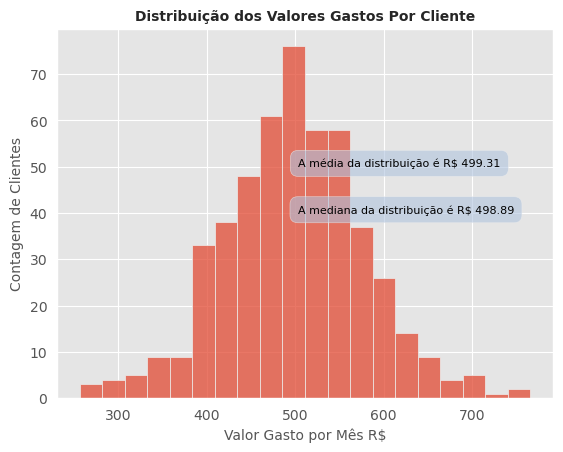

In [6]:
sns.histplot(dados, x='valor_total_gasto');
plt.title("Distribuição dos Valores Gastos Por Cliente", fontsize=10, fontweight='bold');
plt.xlabel("Valor Gasto por Mês R$", fontsize=10);
plt.ylabel("Contagem de Clientes", fontsize=10);

media = dados['valor_total_gasto'].mean()
mediana = dados['valor_total_gasto'].median()

plt.text(media + 4, 50, f"A média da distribuição é R$ {media:.2f}", fontsize=8, color='black', ha='left', 
         bbox={'facecolor' : 'lightsteelblue',
               'alpha': 0.6,
               'pad': 0.7,
               'boxstyle' : 'round'});

plt.text(mediana + 4, 40, f"A mediana da distribuição é R$ {mediana:.2f}", fontsize=8, color='black', ha='left', 
         bbox={'facecolor' : 'lightsteelblue',
               'alpha': 0.6,
               'pad': 0.7,
               'boxstyle' : 'round'});

Nossa variável target, também apresenta uma distribuição normal.

Uma vez verificado que as variáveis possuem uma distribuição normal, não precisamos aqui fazer análises para buscar outliers. Vamos analisar as correlações em uma abordagem bivariada.

#### **Relação Entre Tempo no Web Site e Valor Gasto**

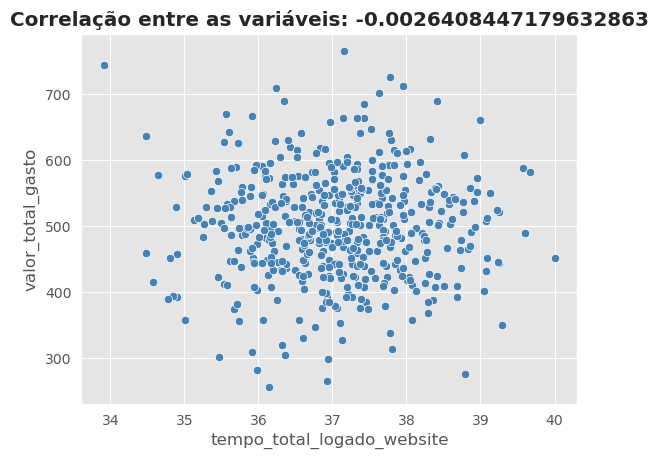

In [7]:
sns.scatterplot(data=dados, 
                x='tempo_total_logado_website',
                y='valor_total_gasto',
                color = 'steelblue');


correlacao = dados['tempo_total_logado_website'].corr(dados['valor_total_gasto'])
plt.title(f"Correlação entre as variáveis: {correlacao}", fontweight='bold');

Podemos ver que não há uma tendência nem positiva e nem negativa (*conforme o índice de correlação*); ou seja, não parece haver um relacionamento direto entre essas duas variáveis. Se o cliente passa mais ou menos tempo logado no website, aparentemente não faz diferença no valor que ele gasta comprando produtos.

#### **Relação Entre o Tempo de Cadastro do Cliente e o Valor Gasto**

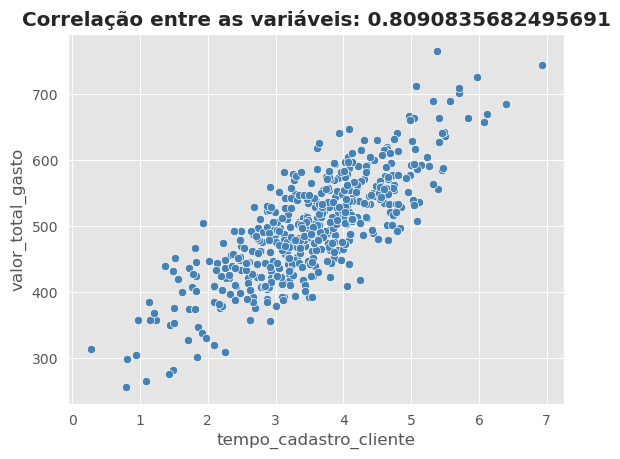

In [8]:
sns.scatterplot(data=dados, 
                x='tempo_cadastro_cliente',
                y='valor_total_gasto',
                color = 'steelblue');


correlacao = dados['tempo_cadastro_cliente'].corr(dados['valor_total_gasto'])
plt.title(f"Correlação entre as variáveis: {correlacao}", fontweight='bold');

Temos uma correlação positiva muito forte! Ou seja, aparentemente quanto mais tempo como cliente do e-commerce, maior o valor gasto.

Cabe aqui, levantar a hipótese de que: além de preocupar em investir na melhoria do App ou Site, talvez a empresa deveria também investir em estratégias de retenção do cliente!

#### **Relação Entre Tempo no App e Valor Gasto**

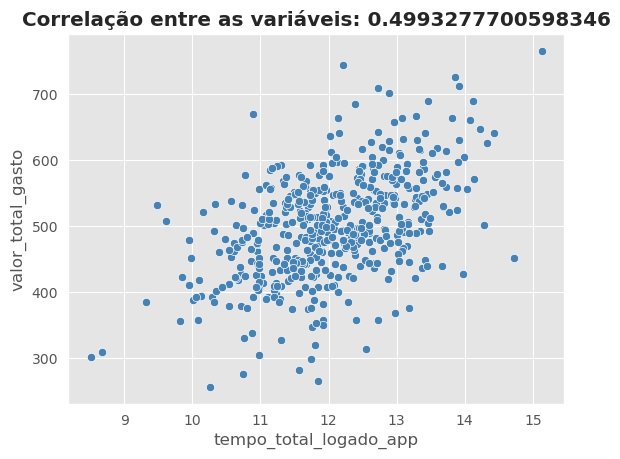

In [9]:
sns.scatterplot(data=dados, 
                x='tempo_total_logado_app',
                y='valor_total_gasto',
                color = 'steelblue');


correlacao = dados['tempo_total_logado_app'].corr(dados['valor_total_gasto'])
plt.title(f"Correlação entre as variáveis: {correlacao}", fontweight='bold');

Veja que à medida que aumenta o tempo logado no App, aumenta também o valor gasto pelo cliente. Temos uma correlação positiva moderada.  
Este fato pode indicar uma necessidade de maior investimento no App, porém ainda estamos apenas na etapa exploratória.

#### **Relação Entre Número Médio de Cliques por Sessão e o Valor Total Gasto**

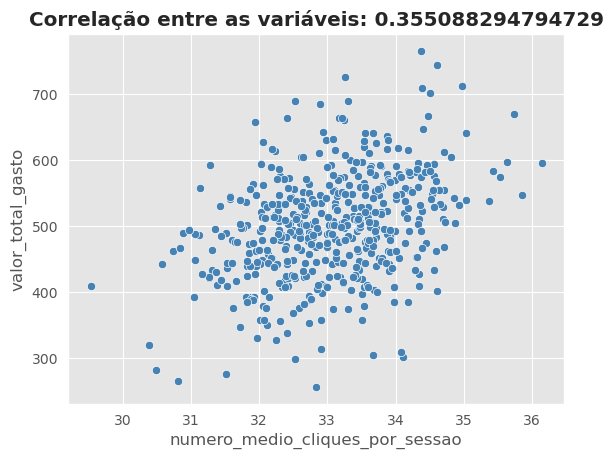

In [10]:
sns.scatterplot(data=dados, 
                x='numero_medio_cliques_por_sessao',
                y='valor_total_gasto',
                color = 'steelblue');


correlacao = dados['numero_medio_cliques_por_sessao'].corr(dados['valor_total_gasto'])
plt.title(f"Correlação entre as variáveis: {correlacao}", fontweight='bold');

Temos uma correlação positiva moderada. Aparentemete, quanto mais tempo o usuário passa dentro da plataforma, maior é o gasto na compra de produtos.

Imporante levantar a hipótese que esta métrica está sendo mais influencida pelo tempo do usuário no App, de acordo com as correlações que já fizemos acima!

#### **Relação Entre Tempo no Logado no App e Tempo Logado no Website**

Provavelmente, não teremos uma relação entre essas duas variáveis; pois o cliente estará logado no App ou no Website. É provável que o número de clientes utilizando as duas apliações ao mesmo tempo seja baixo; portanto, vamos verificar: 

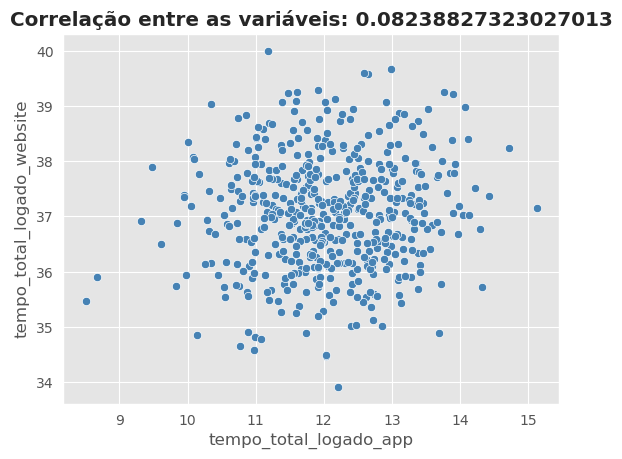

In [11]:
sns.scatterplot(data=dados,
                x='tempo_total_logado_app',
                y='tempo_total_logado_website',
                color='steelblue');

correlacao = dados['tempo_total_logado_app'].corr(dados['tempo_total_logado_website'])
plt.title(f"Correlação entre as variáveis: {correlacao}", fontweight='bold');

De fato, não parece haver uma correlação entre as duas variáveis. É interessante destacar que se houvesse uma correlação positiva entre essas duas variáveis, seria necessário investigar um pouco mais.

Por exemplo, imagine o cenário onde o tempo logado no website aumente conforme o aumento do tempo logado no App. Este fato poderia indicar que um cliente poderia estar utilizando as duas plataformas ao mesmo tempo, que seria incomum. Seria necessário inclusive investigar se os dados foram coletados da maneira correta.

Até este momento, não foi identificado nenhum problema crítico entre as variáveis. Para a finalidade deste trabalho (*considerando a técnica que será utilizada*), o ideal seria que todas as variveis preditoras tivessem uma boa correlação com a variável alvo; porém, identificamos que a variável "tempo_logado_website" não tem uma forte correlação com a variável alvo. Mesmo assim, vamos optar por manter esta variável para comparar no resultado final. O motivo dessa decisão, é simples: **não estamos construindo um modelo para fazer previsões, mas sim para estudar a relação entre as variáveis**! Portanto, vamos ver o efeito dessa variável no resultado final.

#### **Pré-Processamento dos Dados Para Construção de Modelos de Machine Learning**

Vamos agora, dividir os dados em treino e teste.

In [12]:
# Variáveis Preditoras
X = dados[['tempo_cadastro_cliente',
           'numero_medio_cliques_por_sessao',
           'tempo_total_logado_app',
           'tempo_total_logado_website']]

In [13]:
# Variável Target
y = dados['valor_total_gasto']

In [14]:
# Divisão em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
print(f" O conjunto de treino ficou com {len(X_treino)} registros e o conjunto de teste ficou com {len(X_teste)} registros")

 O conjunto de treino ficou com 350 registros e o conjunto de teste ficou com 150 registros


Uma das premissas do modelo de regressão, é que tenhamos os dados na mesma escala. No caso deste estudo, os dados do nosso dataset já estão praticamente na mesma escala:

In [16]:
X_treino.sample(8)

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website
1,4.198349,35.371876,10.572467,36.862183
291,3.634996,33.780157,11.917636,36.844734
197,2.941411,32.449522,13.457725,37.238806
270,2.367848,32.727319,13.013376,36.651278
73,3.663105,34.555768,12.170525,39.131097
427,2.829700,32.377990,11.971751,37.199368
419,3.336339,33.481931,11.918670,37.317705
383,2.627625,33.344509,10.969803,35.974578


Porém, vamos seguir as premissas e aplicar a padronização.

In [17]:
# estanciando uma classe do StandardScaler
scaler = StandardScaler()
# treinando o padronizador com os dados de treino
scaler.fit(X_treino)

StandardScaler()

In [18]:
X_treino = scaler.transform(X_treino)

In [19]:
X_teste = scaler.transform(X_teste)

Vamos criar o **primeiro modelo**, que será o modelo mais básico (benchmark). Logo após, vamos tentar modelos um pouco mais avançados e comparar as performances.

In [20]:
# Criando o modelo_v1
modelo_v1 = LinearRegression()

# Treinando o modelo_v1
modelo_v1.fit(X_treino, y_treino)

LinearRegression()

In [21]:
print("Coeficientes: \n", modelo_v1.coef_)

Coeficientes: 
 [63.74220716 26.23901606 38.57185551  0.6847366 ]


Acima, temos os coeficientes do nosso modelo de Benchmark. Vamos salvá-los em um Dataframe:

In [22]:
# Coeficientes das Variáveis Preditoras
df_coef = pd.DataFrame(modelo_v1.coef_, X.columns, columns=['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


**Avaliação do Modelo 1**

In [23]:
# Previsoes com dados de teste
pred_v1 = modelo_v1.predict(X_teste)

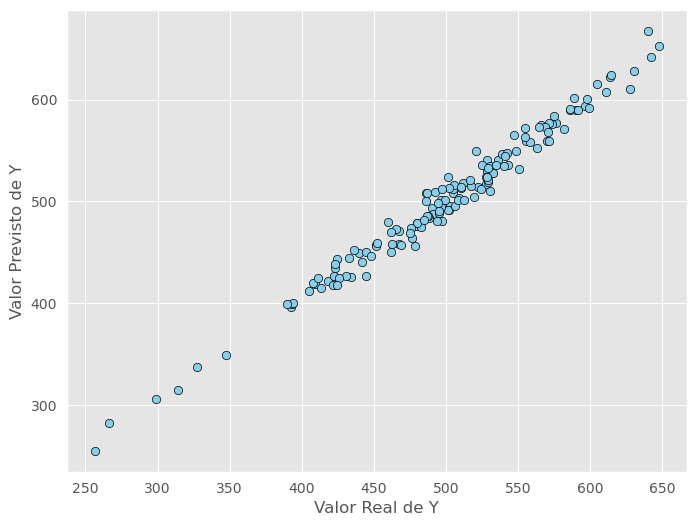

In [24]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x = y_teste, y = pred_v1, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

Analisando matemáticamente, veja que no gráfico acima, onde plotamos no eixo x os valores reais gasto pelo cliente e no eixo y os valores previstos do gasto do cliente; obtivemos um gráfico bem próximo ao gráfico de uma função identidade. Ou seja, isto significa que os valores de gasto previstos estão bem próximos aos valores reais gastos, por um determinado cliente. Em outras palavras, significa que o modelo tem uma boa taxa de acertos.

Porém, precisamos também calcular as seguintes métricas:

In [25]:
# Valor médio gasto pelos clientes
print(f"A média de gasto por cliente, é de R$ {dados['valor_total_gasto'].mean().round(2)} reais.")

A média de gasto por cliente, é de R$ 499.31 reais.


In [26]:
# Valor mínimo
print(f"O valor mínimo de gasto é de R$ {round(dados['valor_total_gasto'].min(), 2)} reais.")

O valor mínimo de gasto é de R$ 256.67 reais.


In [27]:
# Valor máximo
print(f"O valor máximo de gasto é de R$ {round(dados['valor_total_gasto'].max(), 2)} reais.")

O valor máximo de gasto é de R$ 765.52 reais.


In [28]:
# MAE - Erro Médio Absoluto
print(f"Erro Absoluto médio: {mean_absolute_error(y_teste, pred_v1)}")

Erro Absoluto médio: 7.762418645778977


O MAE prevê que, em média, as previsões do nosso modelo (*de valores gastos*) estão erradas em aproximadamente 7,76 reais; o que é um valor pequeno comparado ao valor médio gasto por cliente. **Isto significa que o modelo conseguiu encontrar boa parte do padrão dos dados!**

In [29]:
# MSE - Erro Quadrático Médio
print(f"Erro quadrático médio: {mean_squared_error(y_teste, pred_v1)}")

Erro quadrático médio: 94.95654308438658


In [30]:
# RMSE - Raiz quadrada do erro quadrátivo médio
print(f"A raiz quadrada do erro quadrático médio, é {np.sqrt(mean_squared_error(y_teste, pred_v1))}")

A raiz quadrada do erro quadrático médio, é 9.744564797074654


A métrica acima, indica que, em média, as previsões do nosso modelo estão erradas em aproximadamente 9,74; que é um valor pequeno comparado ao valor médio gasto por cliente!

In [31]:
# Coeficiente R2
print(f"O r2_score é de {r2_score(y_teste, pred_v1)}")

O r2_score é de 0.9813622791776302


O coeficiente R2 indica uma boa performance do modelo - *o coeficiente R2 varia de 0 a 1; e quanto maior, melhor!*

In [32]:
print(f"A variância explicada é de {explained_variance_score(y_teste, pred_v1)}")

A variância explicada é de 0.981744918342864


A função utilizada acima, calcula o quanto de variância dos dados o nosso modelo consegue explicar. Ou seja, o nosso modelo é capaz de explicar 98% da variância dos dados, o que é excelente!

Vamos agora, olhar para os resíduos. Os resíduos, têm uma importância imensa em modelos de Regressão Linear: **uma das premissas para modelos de Regressão, é que os resíduos sigam uma distribuição normal, ou uma aproximação de uma distribuição normal.**

*Cálculo do resíduo para cada observação i: valor_real(i) - valor_previsto(i)*

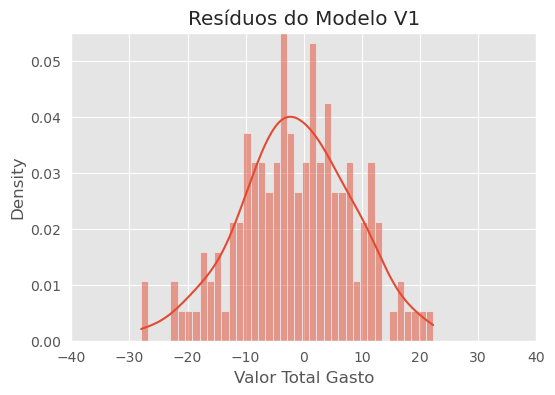

In [33]:
plt.figure(figsize=(6,4))
ax = sns.histplot((y_teste - pred_v1),
                  bins=40,
                  kde=True,
                  stat="density")
ax.set(xlim = (-40, 40))
ax.set_title("Resíduos do Modelo V1")
ax.set_xlabel("Valor Total Gasto")
ax.set(ylim = (0, 0.055));

A distribuição dos resíduos se assemelha a uma distribuição normal, o que sugere que o modelo é apropriado para os dados. Este modelo Benchmark, pode ser levado para a produção e pode entregar resultados ao tomador de decisões! 

Vamos ainda, fazer algumas experimentações para testar se conseguimos melhorar a performance da primeira versão do modelo.

O algoritmo que utilizamos de Regressão Linear para o primeiro modelo (benchmark), é o modelo mais básico e simples da regressão. Ele assume uma relação linear entre a variável preditora e a variável target; não lida com a multicolinearidade, deixando o modelo sensível às altas correlações entre as variáveis preditoras (se houver). Dentro do cenário deste projeto, este modelo (mesmo sendo o mais simples) se mostrou excelente, até mesmo pelo fato de termos um dataset simples e sem multicolinearidade (*como pode ser verificado abaixo*).

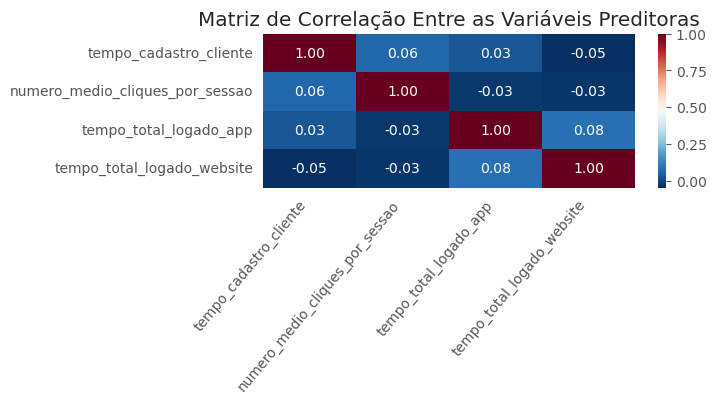

In [34]:
plt.figure(figsize=(6,2))
correlation_mtx = X.corr()

ax = sns.heatmap(correlation_mtx, annot=True, cmap='RdBu_r', fmt=".2f", xticklabels=correlation_mtx.columns, yticklabels=correlation_mtx.columns)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, horizontalalignment='right')
plt.title("Matriz de Correlação Entre as Variáveis Preditoras")
plt.show();

Logo a seguir, vamos construir e treinar mais dois modelos: um modelo de **Regressão Ridge**, que adiciona uma penalização ao quadrado dos coeficientes e torna o modelo menos suscetível ao risco de overfiting; e um modelo de **Regressão Lasso**, que adiciona uma penalização ao valor absoluto dos coeficientes, eliminando variáveis não relevantes.

Em teoria, a probabilidade desses dois últimos modelos mencionados perfomarem melhor que o primeiro modelo é mínima; mas, como o intuito deste trabalho é determinar uma função de custo que melhor se aproxima com a realidade de gastos dos clientes através de Regressão, é importante testarmos o maior número de possibilidades de resolução possíveis.

#### **Construção, Treinamento e Avaliação do Modelo 2 com Regressão Ridge**

Os próximos passos, serão muito similares ao que foi desenvolvido na construção e treinamento do modelo 1.

In [35]:
# Criando o segundo modelo
modelo_v2 = Ridge(alpha=1.0)

In [36]:
# Treinamento do modelo_v2
modelo_v2.fit(X_treino, y_treino)

Ridge()

In [37]:
print("Coeficientes: \n", modelo_v2.coef_)

Coeficientes: 
 [63.57245999 26.17198131 38.46758178  0.68013543]


In [38]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v2.coef_, X.columns, columns=['Coeficientes'])
df_coef

,Coeficientes
tempo_cadastro_cliente,63.572460
numero_medio_cliques_por_sessao,26.171981
tempo_total_logado_app,38.467582
tempo_total_logado_website,0.680135


Os valores dos coeficientes do segundo modelo (mostrados acima), estão muito próximos dos valores de coeficientes determinados no primeiro modelo.

In [39]:
# Previsões com dados de teste
pred_v2 = modelo_v2.predict(X_teste)
pred_v2[:10]

array([513.02461894, 593.71284026, 621.32208364, 495.83827761,
       641.71185412, 615.30802007, 591.87884788, 493.61867235,
       457.70805605, 531.9426755 ])

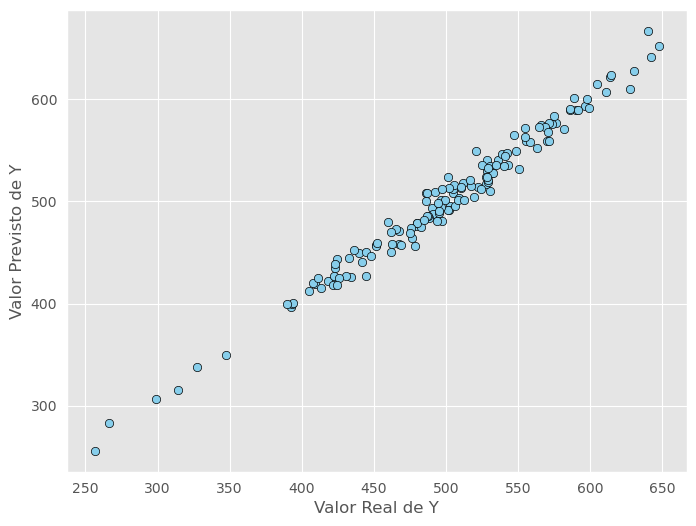

In [40]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x = y_teste, y = pred_v2, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

Conforme fizemos com o primeiro modelo, plotando o gráfico dos valores reais versus valores previstos, encontramos uma gráfico que se aproxima de uma função identidade, o que indica que essa segunda versão do modelo também possui uma boa taxa de acertos.

Vamos analisar as mesmas métricas que foram analisadas para o modelo 1:

In [41]:
# MAE - Erro Médio Absoluto
print(f"Erro Absoluto médio: {mean_absolute_error(y_teste, pred_v2)}")

Erro Absoluto médio: 7.764151148981964


In [42]:
# MSE - Erro Quadrático Médio
print(f"Erro quadrático médio: {mean_squared_error(y_teste, pred_v2)}")

Erro quadrático médio: 94.93731602493466


In [43]:
# RMSE - Raiz quadrada do erro quadrático médio
print(f"A raiz quadrada do erro quadrático médio, é {np.sqrt(mean_squared_error(y_teste, pred_v2))}")

A raiz quadrada do erro quadrático médio, é 9.7435781941202


In [44]:
# Coeficiente R2
print(f"O r2_score é de {r2_score(y_teste, pred_v2)}")

O r2_score é de 0.981366052994101


In [45]:
print(f"A variância explicada é de {explained_variance_score(y_teste, pred_v2)}")

A variância explicada é de 0.9817472659016085


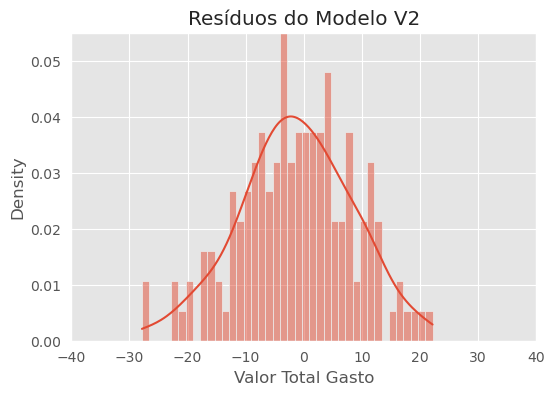

In [46]:
plt.figure(figsize=(6,4))
ax = sns.histplot((y_teste - pred_v2),
                  bins=40,
                  kde=True,
                  stat="density")
ax.set(xlim = (-40, 40))
ax.set_title("Resíduos do Modelo V2")
ax.set_xlabel("Valor Total Gasto")
ax.set(ylim = (0, 0.055));

A segunda versão do modelo teve comportamento quase idêntico ao Benchmark.

#### **Construção, Treinamento e Avaliação do Modelo 3 com Regressão LASSO**

In [47]:
# Criando o modelo_v3
modelo_v3 = Lasso(alpha=1.0)

In [48]:
# Treinamento o modelo_v3
modelo_v3.fit(X_treino, y_treino)

Lasso()

In [49]:
print("Coeficientes: \n", modelo_v3.coef_)

Coeficientes: 
 [62.86344076 25.18747244 37.62149243  0.        ]


In [50]:
df_coef = pd.DataFrame(modelo_v3.coef_, X.columns, columns=['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,62.863441
numero_medio_cliques_por_sessao,25.187472
tempo_total_logado_app,37.621492
tempo_total_logado_website,0.000000


Veja que a terceira versão do modelo apresentou um comportamento bem diferente dos dois modelos anteriores: o coeficiente da variável *tempo_total_logado_website* foi igual a zero, para este modelo.

In [51]:
# Previsões com dados de teste
pred_v3 = modelo_v3.predict(X_teste)
pred_v3[:10]

array([511.50216083, 591.78590214, 619.24047552, 497.55162062,
       640.89951717, 614.42803424, 590.05764493, 494.76617949,
       459.30498489, 529.64197449])

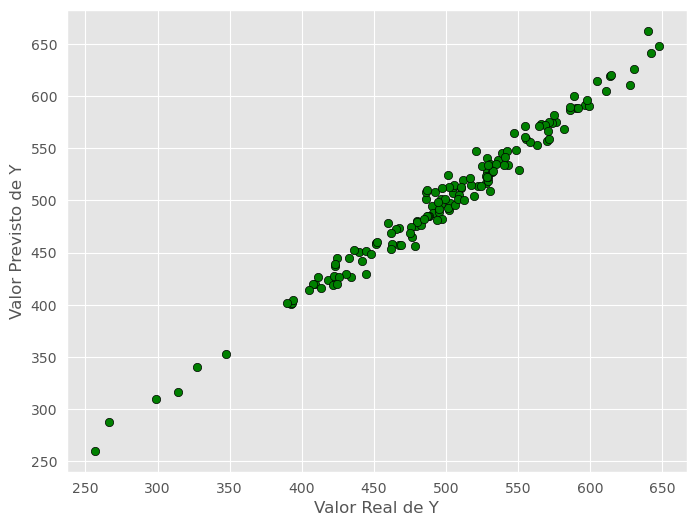

In [52]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x = y_teste, y = pred_v3, color = 'green', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

O gráfico acima, também mostra que temos um bom modelo em mãos. Vamos portanto, verificar as métricas:

In [53]:
# MAE - Erro Médio Absoluto
print(f"Erro Absoluto médio: {mean_absolute_error(y_teste, pred_v3)}")

Erro Absoluto médio: 7.7885046969510645


In [54]:
# MSE - Erro Quadrático Médio
print(f"Erro quadrático médio: {mean_squared_error(y_teste, pred_v3)}")

Erro quadrático médio: 96.05606348970672


In [55]:
# RMSE - Raiz quadrada do erro quadrático médio
print(f"A raiz quadrada do erro quadrático médio, é {np.sqrt(mean_squared_error(y_teste, pred_v3))}")

A raiz quadrada do erro quadrático médio, é 9.800819531534428


Veja que este modelo, apresentou uma taxa de erros levemente maior. Ou seja, a performance diminuiu, em comparação com os dois primeiros modelos! Provavelmente, esta reguralização não foi ideal para este conjunto de dados.

In [56]:
# Coeficiente R2
print(f"O r2_score é de {r2_score(y_teste, pred_v3)}")

O r2_score é de 0.981146469358873


In [57]:
print(f"A variância explicada é de {explained_variance_score(y_teste, pred_v3)}")

A variância explicada é de 0.9815600649101045


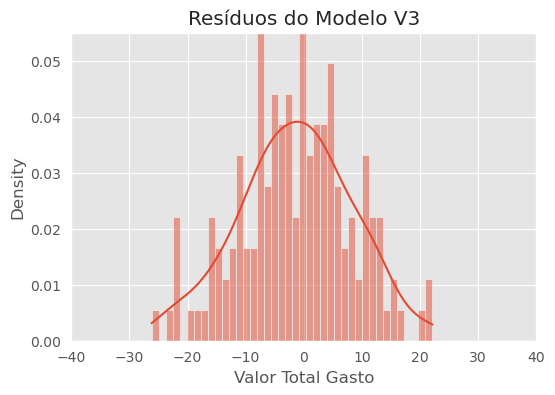

In [58]:
plt.figure(figsize=(6,4))
ax = sns.histplot((y_teste - pred_v3),
                  bins=40,
                  kde=True,
                  stat="density")
ax.set(xlim = (-40, 40))
ax.set_title("Resíduos do Modelo V3")
ax.set_xlabel("Valor Total Gasto")
ax.set(ylim = (0, 0.055));

#### **Seleção do Melhor Modelo**

Tivemos uma boa performance nos 3 modelos construídos dentro do cenário proposto. Porém, o modelo 3 apresentou uma taxa de erro (RMSE) levemente maior, logo vamos descartá-lo. Os modelos 1 e 2 ficaram muito próximos e, neste caso, o ideal é escolher o modelo mais simples para colocar em produção, que neste caso, é a primeira versão: **modelo_v1**.

#### **Conclusão**

In [59]:
# Coeficientes
df_coef_final = pd.DataFrame(modelo_v1.coef_, X.columns, columns=['Coeficiente'])
df_coef_final

,Coeficiente
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


**Interpretação dos Coeficientes**

* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo de cadastro do cliente está associado a um aumento de R$ 63,74 no valor total gasto por cliente por mês.

* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no número médio de cliques por sessão está associado a um aumento de R$ 26,24 no valor total gasto por cliente por mês.

* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo total logado no app está associado a um aumento de R$ 38,57 no valor total gasto por cliente por mês.

* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo total logado no website está associado a um aumento de R$ 0,68 no valor total gasto por cliente por mês.


Podemos concluir que não vale a pena investir no website, mas já no App o cenário é difrente; faz sentido investir no App analisando o retorno. Porém, é importante destacar que o maior retorno de investimento está em manter cliente ao longo do tempo! A área de negócio não fez essa pergunta, o objetivo da área de negócio era responder a pergunta " *Investiver no App ou no Website?* "; e já conseguimos responder esta questão. 

Por outro lado, detectamos um padrão que não estava em evidência nos questionamentos da área de negócio: manter o cliente ao longo do tempo é ainda mais rentável! Logo, talvez a empresa sequer necessita de investimer no App neste momento, mas sim, investir em pesquisas e desenvolvimento de programas de fidelidade e ações similares, para manter o seu cliente ativo. Porém, a própria atualização no App também pode também ser uma forma de reter o cliente por mais tempo, à depender das novas "*features*" que poderão ser implementadas nesta atualização.